# Notebook for EDA-Project "King County House Prices"

Author: Sebastian Fuhrer, sebastian.fuhrer@hotmail.com

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from scipy import stats, linalg
import folium 
from folium import plugins
import statsmodels.api as sms
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn')

## Variable description 

| Variable | Description 
|:-------------|:-----------------------------------------------------------------------------
| Id           | Unique ID for each home sold                                                  
| Date         | Date of the home sale                                                        
| Price        | Price of each home sold                                                       
| Bedroom      | Number of bedrooms  
| Bathrooms    | Number of bathrooms, where .5 accounts for a room with a toilet but no shower
| Sqft_living  | Square footage of the apartments interior space                                
| Sqft_lot     | Square footage of the land space                                              
| Floors       | Number of floors
| Waterfront   | A dummy variable for whether the apartment was overlooking the waterfront or  not
| View         | An index from 0 to 4 of how good the view of the property was
| Condition    | An index from 1 to 5 on the condition of the apartment
| Grade        | An index from 3 to 13, where 3-6 falls short of building construction and      design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design
| Sqft_above   | The square footage of the interior housing space that is above ground level
| Sqft_basement| The square footage of the interior housing space that is below ground level
| Yr_built     | The year the house was initially built
| Yr_renovated | The year of the houses´s last renovation
| Zipcode      | What zipcode area the house is in
| Lat          | Lattitude
| Long         | Longitude
| Sqft_living15| The square footage of interior housing living space for the nearest 15 neighbors
| Sqft_lot15   | The square footage of the land lots of the nearest 15 neighbors




In [2]:
house_prices_df = pd.read_csv('hh-2020-ds1-Project-EDA-master/King_County_House_prices_dataset.csv')
house_prices_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Data cleaning

In [3]:
type(house_prices_df.date[1])

str

In [4]:
type(house_prices_df.sqft_basement[6])

str

sqft_basement is a series with type 'str' and also some values of this series are '?'.
So we replace all '?' with '0.0' and change the type 'str' to type 'float64'.

In [5]:
house_basement = house_prices_df.sqft_basement.str.replace('?','0').astype(float)

In [6]:
house_basement.astype(str).astype(float);

In [7]:
X_df = house_prices_df.drop('sqft_basement',axis=1)
X_df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  yr_built  \
0      5650     1.0         NaN   0.0          3      7        1180      1955   
1      7242     2.0         0.0   0.0          3      7        2170      1951   
2     10000     1.0         0.0   0.0          3      6         770      1933   
3      5000     1.0         0.0   0.0          5      7        1050      1965   
4      8080     1.0         0.0   0.0          3      8        1680      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0           0.0    98178  47.5112 -122.257           1340        5650  
1        1991.0    98125  47.7210 -122.319           1690        7639  
2           NaN    98028  47.7379 -122.233           2720        8062  
3           0.0    98136  47.5208 -122.393           1360        5000  
4           0.0    98074  47.6168 -122.045           1800        7503

In [8]:
Z_df = X_df.drop('date',axis=1)
Z_df.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  yr_built  yr_renovated  \
0         NaN   0.0          3      7        1180      1955           0.0   
1         0.0   0.0          3      7        2170      1951        1991.0   
2         0.0   0.0          3      6         770      1933           NaN   
3         0.0   0.0          5      7        1050      1965           0.0   
4         0.0   0.0          3      8        1680      1987           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

In [9]:
Y_df = Z_df.join(house_basement)
type(Y_df.sqft_basement[6])
Y_df.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  yr_built  yr_renovated  \
0         NaN   0.0          3      7        1180      1955           0.0   
1         0.0   0.0          3      7        2170      1951        1991.0   
2         0.0   0.0          3      6         770      1933           NaN   
3         0.0   0.0          5      7        1050      1965           0.0   
4         0.0   0.0          3      8        1680      1987           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  sqft_basement  
0    98178  47.5112 -122.257           1340        5650            0.0  
1    98125  47.7210 -122.319           1690        7639          400.0  
2    98028  47.7379 -122.233           2720        8062            0.0  
3    98136  47.5208 -122.393           1360        5000          910.0  
4    98074  47.6168 -122.045           1800        7503            0.0

## Type of data and missings

In [10]:
# To get a closer look at the data
print('Number of rows and columns of house_prices_df: ',house_prices_df.shape)
Y_df.head()

Number of rows and columns of house_prices_df:  (21597, 21)


id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  yr_built  yr_renovated  \
0         NaN   0.0          3      7        1180      1955           0.0   
1         0.0   0.0          3      7        2170      1951        1991.0   
2         0.0   0.0          3      6         770      1933           NaN   
3         0.0   0.0          5      7        1050      1965           0.0   
4         0.0   0.0          3      8        1680      1987           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  sqft_basement  
0    98178  47.5112 -122.257           1340        5650            0.0  
1    98125  47.7210 -122.319           1690        7639          400.0  
2    98028  47.7379 -122.233           2720        8062            0.0  
3    98136  47.5208 -122.393           1360        5000          910.0  
4    98074  47.6168 -122.045           1800        7503            0.0

In [11]:
Y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
sqft_basement    21597 non-null float64
dtypes: float64(9), int64(11)
memory usage: 3.3 MB


In [12]:
missing = pd.DataFrame(Y_df.isnull().sum(),columns=['Number'])
missing['Percentage'] = round(missing.Number/Y_df.shape[0]*100,1)
missing[missing.Number!=0]


Number  Percentage
waterfront      2376        11.0
view              63         0.3
yr_renovated    3842        17.8

Of the 21 variables 3 have missing values.
- **waterfront** has no values for 11.0 percent of instances
- **view** has only 63 instances or 0.3 percent missing values
- **yr_renovated** is not known in 17.8 percent of all cases

## Basic statistics

In [13]:
Y_df.describe().round(2)

id       price  bedrooms  bathrooms  sqft_living    sqft_lot  \
count  2.159700e+04    21597.00  21597.00   21597.00     21597.00    21597.00   
mean   4.580474e+09   540296.57      3.37       2.12      2080.32    15099.41   
std    2.876736e+09   367368.14      0.93       0.77       918.11    41412.64   
min    1.000102e+06    78000.00      1.00       0.50       370.00      520.00   
25%    2.123049e+09   322000.00      3.00       1.75      1430.00     5040.00   
50%    3.904930e+09   450000.00      3.00       2.25      1910.00     7618.00   
75%    7.308900e+09   645000.00      4.00       2.50      2550.00    10685.00   
max    9.900000e+09  7700000.00     33.00       8.00     13540.00  1651359.00   

         floors  waterfront      view  condition     grade  sqft_above  \
count  21597.00    19221.00  21534.00   21597.00  21597.00    21597.00   
mean       1.49        0.01      0.23       3.41      7.66     1788.60   
std        0.54        0.09      0.77       0.65      1.17      827.76   
min        1.00        0.00      0.00       1.00      3.00      370.00   
25%        1.00        0.00      0.00       3.00      7.00     1190.00   
50%        1.50        0.00      0.00       3.00      7.00     1560.00   
75%        2.00        0.00      0.00       4.00      8.00     2210.00   
max        3.50        1.00      4.00       5.00     13.00     9410.00   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
count  21597.00      17755.00  21597.00  21597.00  21597.00       21597.00   
mean    1971.00         83.64  98077.95     47.56   -122.21        1986.62   
std       29.38        399.95     53.51      0.14      0.14         685.23   
min     1900.00          0.00  98001.00     47.16   -122.52         399.00   
25%     1951.00          0.00  98033.00     47.47   -122.33        1490.00   
50%     1975.00          0.00  98065.00     47.57   -122.23        1840.00   
75%     1997.00          0.00  98118.00     47.68   -122.12        2360.00   
max     2015.00       2015.00  98199.00     47.78   -121.32        6210.00   

       sqft_lot15  sqft_basement  
count    21597.00       21597.00  
mean     12758.28         285.72  
std      27274.44         439.82  
min        651.00           0.00  
25%       5100.00           0.00  
50%       7620.00           0.00  
75%      10083.00         550.00  
max     871200.00        4820.00

## Correlation analyis

$r_{x,y} = \frac{\Sigma_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\Sigma_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\Sigma_{i=1}^{n}(y_i-\bar{y})^2}}=\frac{Cov(x,y)}{Std(x)\times Std(y)}$

In [14]:
continuous_var = list(Y_df.select_dtypes(
                            ['int64','float64']).columns.values)
continuous_var.remove('id')
categorical_var = ['date']
continuous_var

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'sqft_basement']

In [15]:
Y_df.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016772  0.001150   0.005162    -0.012241 -0.131911   
price         -0.016772  1.000000  0.308787   0.525906     0.701917  0.089876   
bedrooms       0.001150  0.308787  1.000000   0.514508     0.578212  0.032471   
bathrooms      0.005162  0.525906  0.514508   1.000000     0.755758  0.088373   
sqft_living   -0.012241  0.701917  0.578212   0.755758     1.000000  0.173453   
sqft_lot      -0.131911  0.089876  0.032471   0.088373     0.173453  1.000000   
floors         0.018608  0.256804  0.177944   0.502582     0.353953 -0.004814   
waterfront    -0.004176  0.276295 -0.002386   0.067282     0.110230  0.023143   
view           0.011592  0.395734  0.078523   0.186451     0.282532  0.075298   
condition     -0.023803  0.036056  0.026496  -0.126479    -0.059445 -0.008830   
grade          0.008188  0.667951  0.356563   0.665838     0.762779  0.114731   
sqft_above    -0.010799  0.605368  0.479386   0.686668     0.876448  0.184139   
yr_built       0.021617  0.053953  0.155670   0.507173     0.318152  0.052946   
yr_renovated  -0.012010  0.129599  0.018495   0.051050     0.055660  0.004513   
zipcode       -0.008211 -0.053402 -0.154092  -0.204786    -0.199802 -0.129586   
lat           -0.001798  0.306692 -0.009951   0.024280     0.052155 -0.085514   
long           0.020672  0.022036  0.132054   0.224903     0.241214  0.230227   
sqft_living15 -0.002701  0.585241  0.393406   0.569884     0.756402  0.144763   
sqft_lot15    -0.138557  0.082845  0.030690   0.088303     0.184342  0.718204   
sqft_basement -0.004359  0.321108  0.297229   0.278485     0.428660  0.015031   

                 floors  waterfront      view  condition     grade  \
id             0.018608   -0.004176  0.011592  -0.023803  0.008188   
price          0.256804    0.276295  0.395734   0.036056  0.667951   
bedrooms       0.177944   -0.002386  0.078523   0.026496  0.356563   
bathrooms      0.502582    0.067282  0.186451  -0.126479  0.665838   
sqft_living    0.353953    0.110230  0.282532  -0.059445  0.762779   
sqft_lot      -0.004814    0.023143  0.075298  -0.008830  0.114731   
floors         1.000000    0.021883  0.028436  -0.264075  0.458794   
waterfront     0.021883    1.000000  0.406654   0.017642  0.087383   
view           0.028436    0.406654  1.000000   0.045735  0.249727   
condition     -0.264075    0.017642  0.045735   1.000000 -0.146896   
grade          0.458794    0.087383  0.249727  -0.146896  1.000000   
sqft_above     0.523989    0.075463  0.166299  -0.158904  0.756073   
yr_built       0.489193   -0.026079 -0.054564  -0.361592  0.447865   
yr_renovated   0.003535    0.087244  0.100964  -0.061858  0.016669   
zipcode       -0.059541    0.031057  0.085277   0.002888 -0.185771   
lat            0.049239   -0.012772  0.006141  -0.015102  0.113575   
long           0.125943   -0.039864 -0.077894  -0.105877  0.200341   
sqft_living15  0.280102    0.088860  0.279561  -0.093072  0.713867   
sqft_lot15    -0.010722    0.032002  0.073332  -0.003126  0.120981   
sqft_basement -0.241866    0.088213  0.271689   0.168482  0.165843   

               sqft_above  yr_built  yr_renovated   zipcode       lat  \
id              -0.010799  0.021617     -0.012010 -0.008211 -0.001798   
price            0.605368  0.053953      0.129599 -0.053402  0.306692   
bedrooms         0.479386  0.155670      0.018495 -0.154092 -0.009951   
bathrooms        0.686668  0.507173      0.051050 -0.204786  0.024280   
sqft_living      0.876448  0.318152      0.055660 -0.199802  0.052155   
sqft_lot         0.184139  0.052946      0.004513 -0.129586 -0.085514   
floors           0.523989  0.489193      0.003535 -0.059541  0.049239   
waterfront       0.075463 -0.026079      0.087244  0.031057 -0.012772   
view             0.166299 -0.054564      0.100964  0.085277  0.006141   
condition       -0.158904 -0.361592     -0.061858  0.002888 -0.015102   
grade            0.756073  0.447865      0.01

Pairplots are not really clear in this case

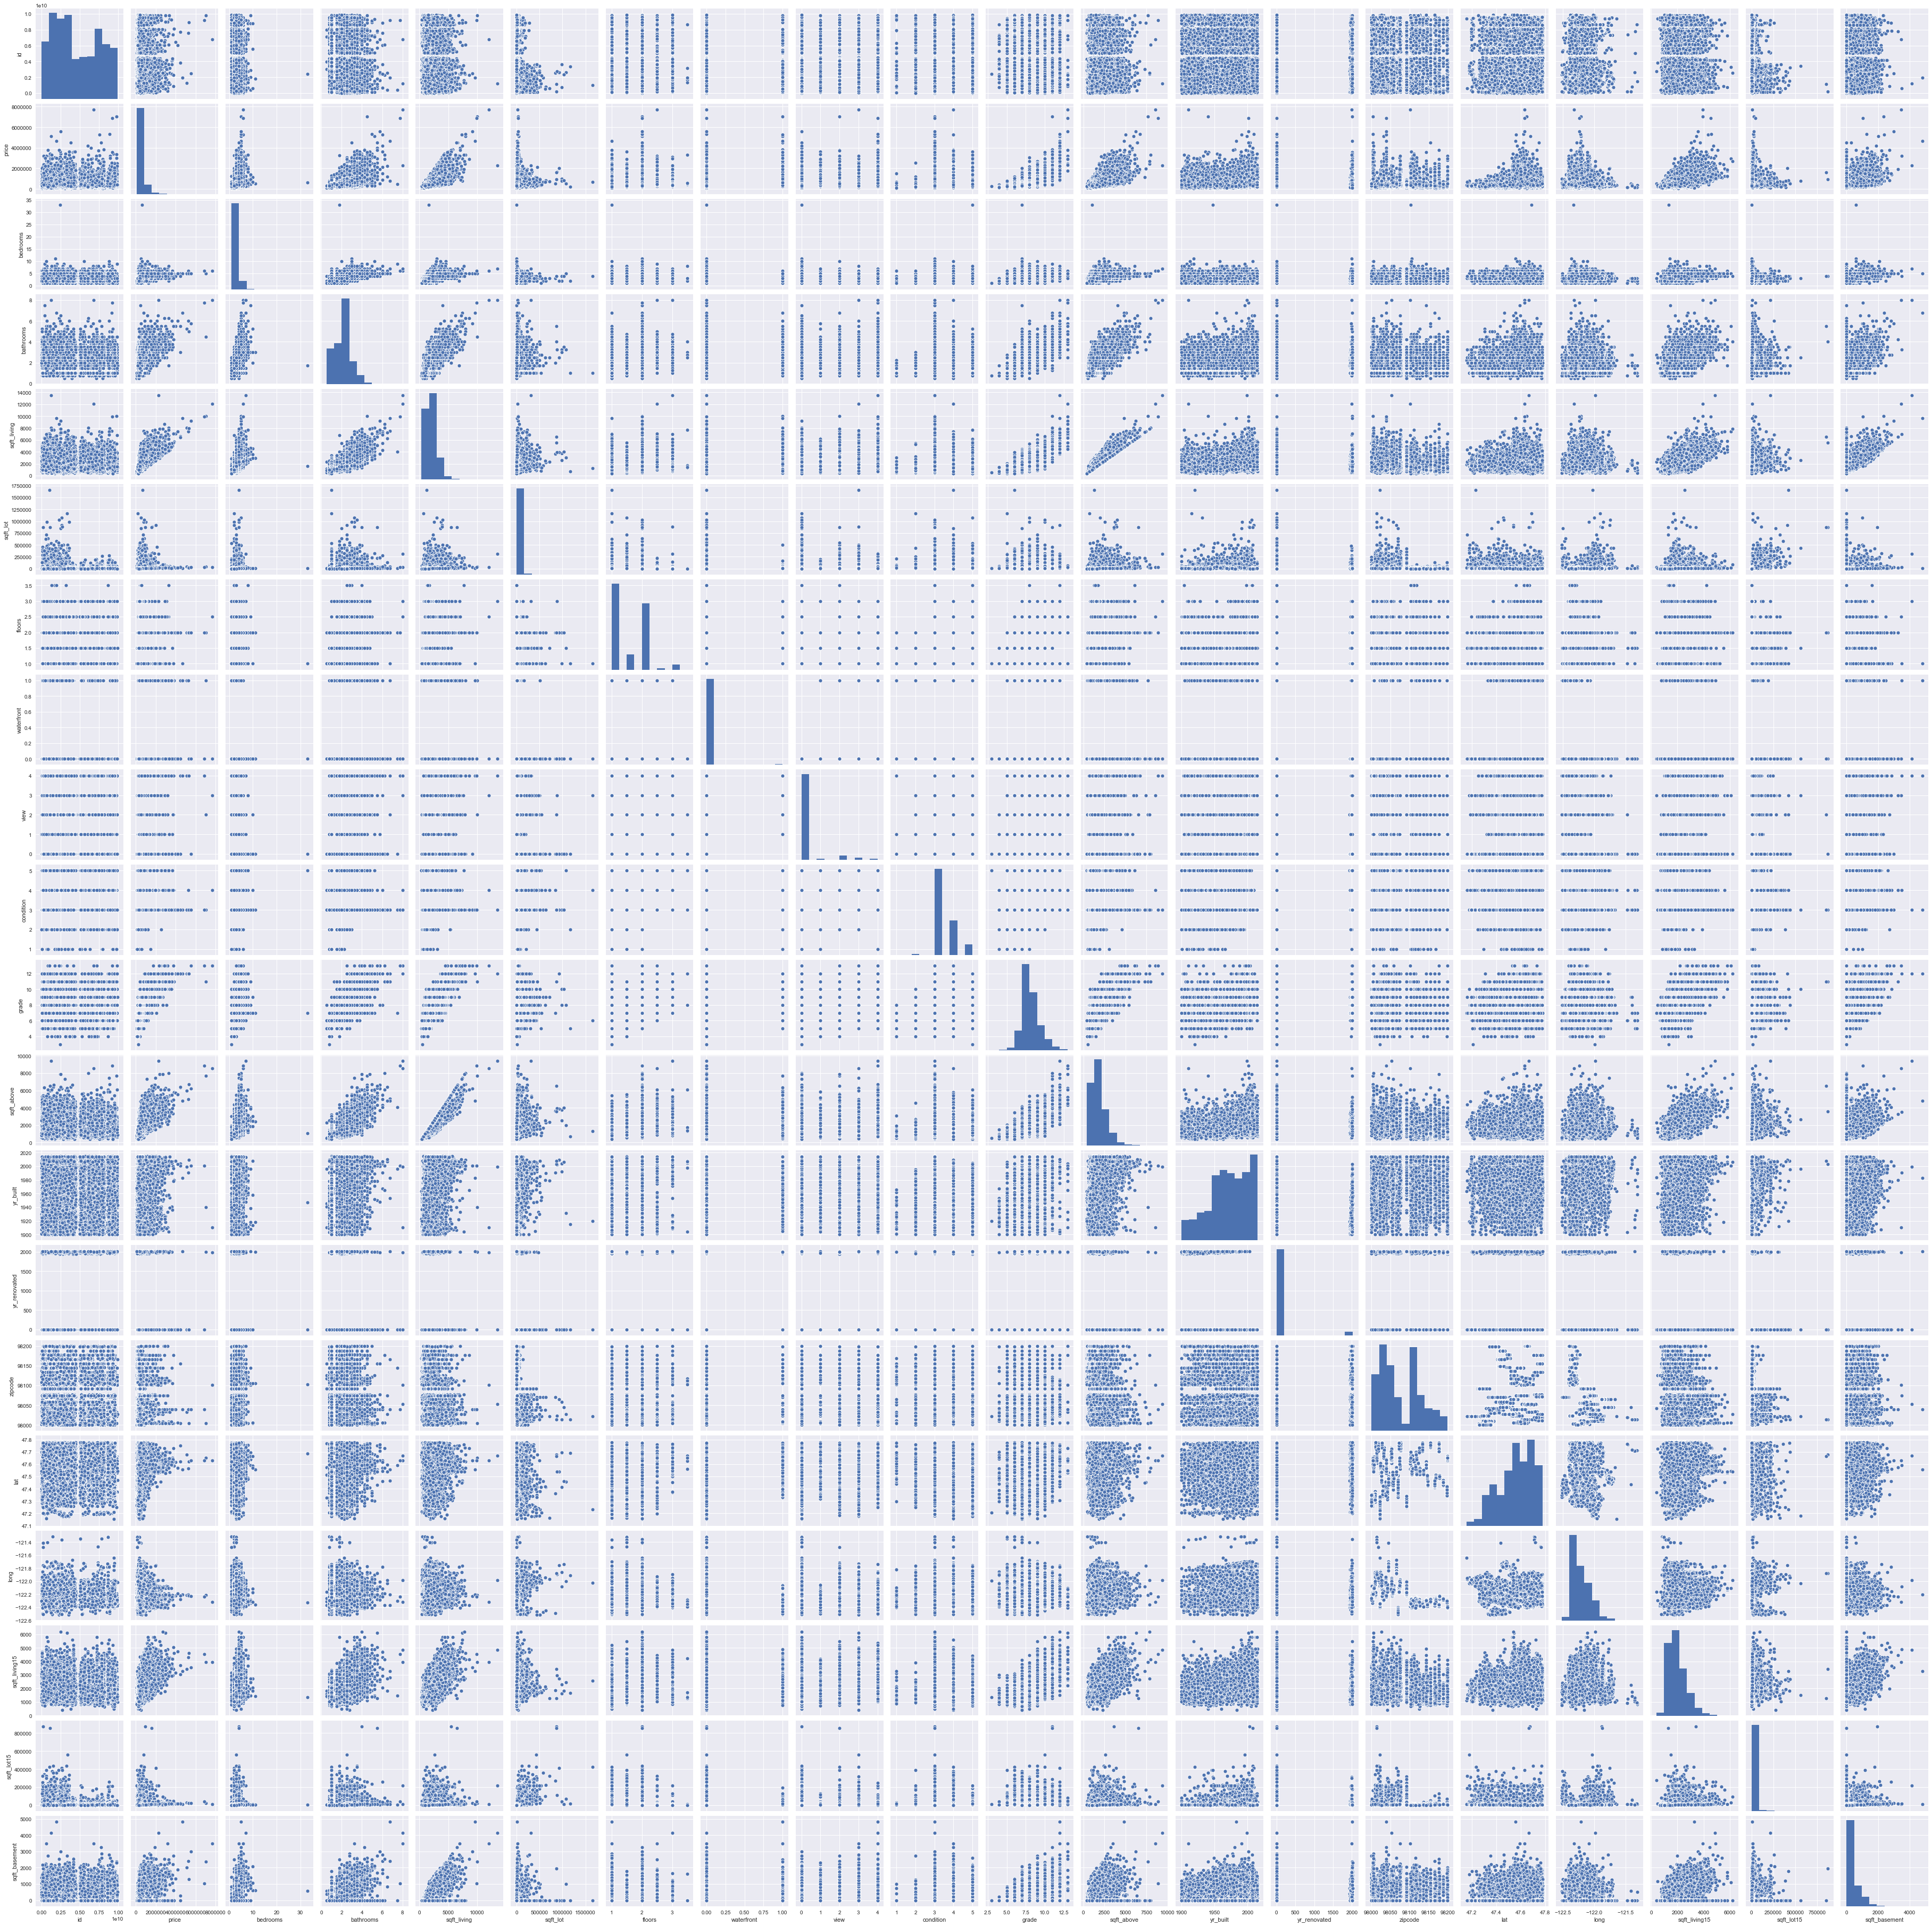

In [236]:
X=sns.pairplot(Y_df);

## Histograms

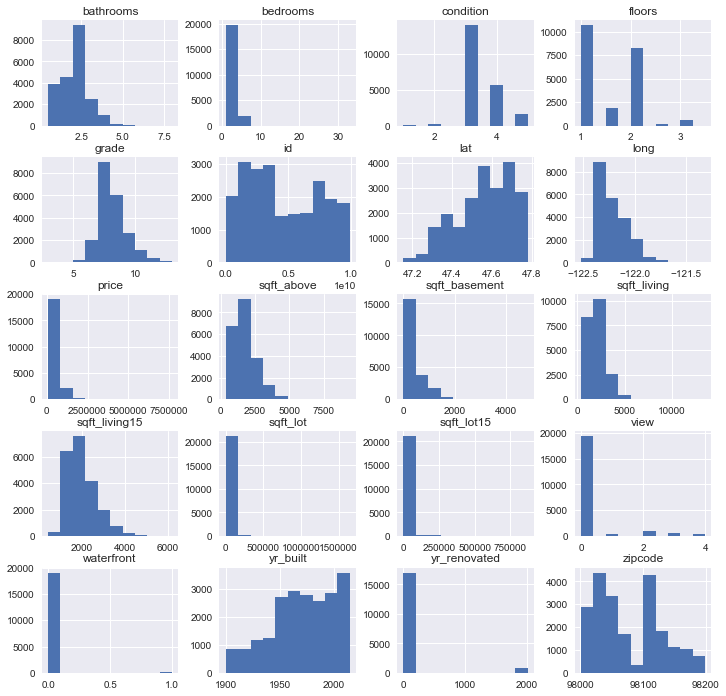

In [237]:
Z = Y_df.hist(figsize=(12,12))
plt.savefig('hist_all.png')

## Scatterplots

I try through visualization to identify house features that affect the price variable and could be potential predictors. The correlation coefficient indicates the extent to which two features are more linearly dependent on one another. Since the features 'sqft_living', 'grade' and 'sqft_above' have a high correlation coefficient, i visualize them in a scatter plot.

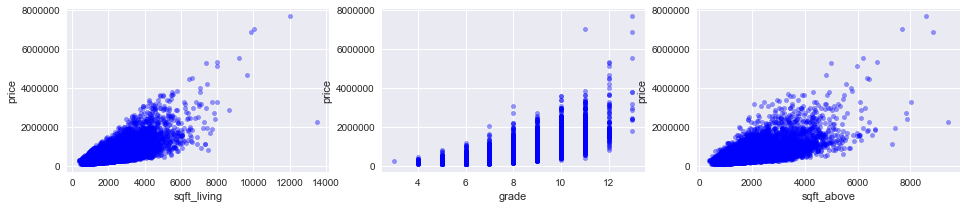

In [308]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'grade', 'sqft_above'], axes):
    Y_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

Now we look at the associated regression line

In [287]:
X_1 = Y_df[['sqft_living']]
X_1 = sms.add_constant(X_1)
X_1.head()

const  sqft_living
0    1.0         1180
1    1.0         2570
2    1.0          770
3    1.0         1960
4    1.0         1680

In [288]:
y_1 = Y_df.price
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [289]:
# Create a OLS model
model = sms.OLS(y_1,X_1)
results = model.fit()

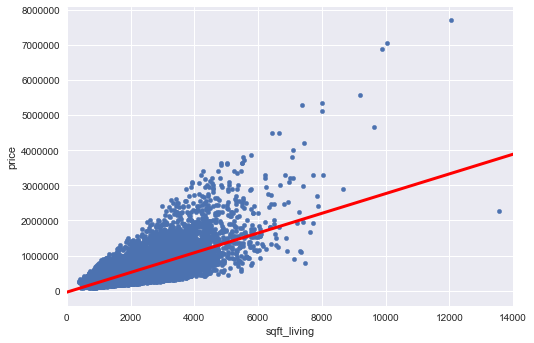

In [290]:
intercept, slope = results.params
ax = Y_df.plot('sqft_living', 'price', kind='scatter')
xx = np.linspace(0, 14000, 100)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
ax.set_xlim([0,14000]);

In [292]:
X_2 = Y_df[['grade']]
X_2 = sms.add_constant(X_2)
X_2.head()

const  grade
0    1.0      7
1    1.0      7
2    1.0      6
3    1.0      7
4    1.0      8

In [294]:
model = sms.OLS(y_1,X_2)
results = model.fit()

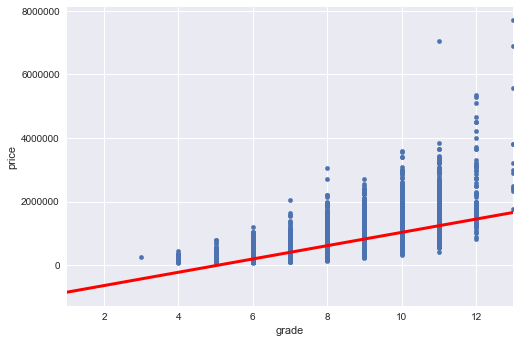

In [298]:
intercept, slope = results.params
ax = Y_df.plot('grade', 'price', kind='scatter')
xx = np.linspace(1, 13, 100)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
ax.set_xlim([1,13]);

In [300]:
X_3 = Y_df[['sqft_above']]
X_3 = sms.add_constant(X_3)
X_3.head()

const  sqft_above
0    1.0        1180
1    1.0        2170
2    1.0         770
3    1.0        1050
4    1.0        1680

In [301]:
model = sms.OLS(y_1,X_3)
results = model.fit()

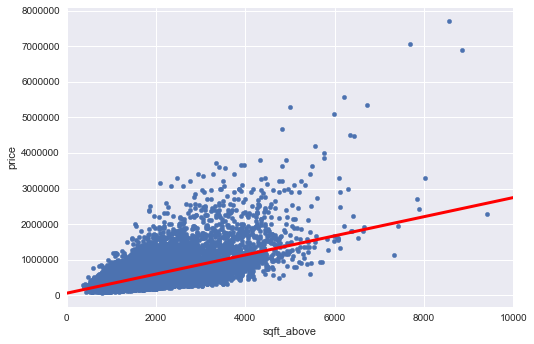

In [304]:
intercept, slope = results.params
ax = Y_df.plot('sqft_above', 'price', kind='scatter')
xx = np.linspace(0, 10000, 100)
ax.plot(xx, xx*slope + intercept, color='red', lw=3)
ax.set_xlim([0,10000]);

## Deeper look into the data

Latitude and Longitude

In [320]:
import math
Y_df['log_price'] = [math.log(float(p)) for p in Y_df.price]

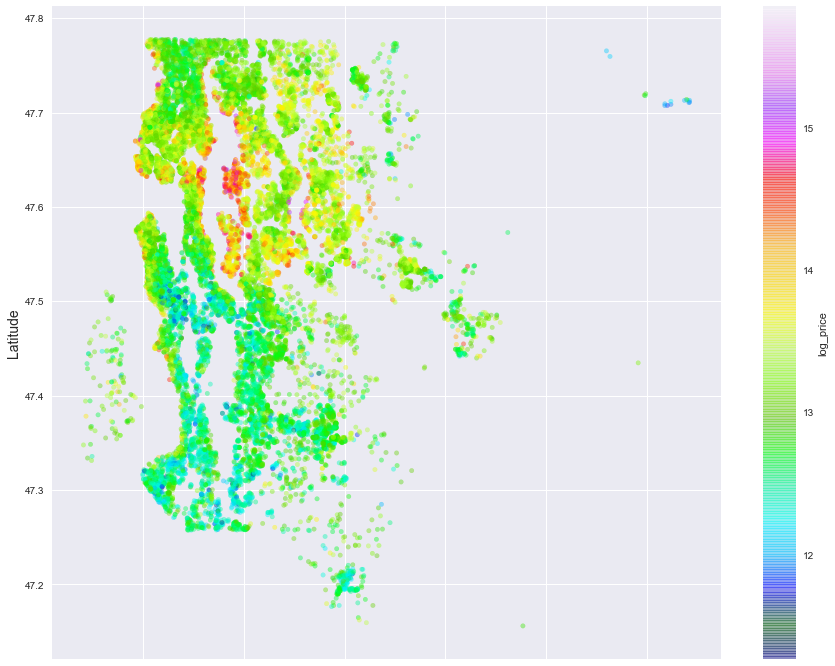

In [319]:
Y_df.plot(kind='scatter', x='long', y='lat', c='log_price',
             cmap=plt.get_cmap('gist_ncar'),colorbar=True,
             alpha=0.4,figsize=(15, 12))
#Labels
plt.ylabel('Latitude', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.show()

With Basement more worth then without?

In [26]:
Y_df.sqft_basement.sort_values().tail()

10074    3260.0
7245     3480.0
15468    3500.0
12764    4130.0
8085     4820.0
Name: sqft_basement, dtype: float64

In [27]:
y_basement = Y_df.query('sqft_basement > 0')
y_basement.head()

id      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1   6414100192   538000.0         3       2.25         2570      7242     2.0   
3   2487200875   604000.0         4       3.00         1960      5000     1.0   
5   7237550310  1230000.0         4       4.50         5420    101930     1.0   
8   2414600126   229500.0         3       1.00         1780      7470     1.0   
10  1736800520   662500.0         3       2.50         3560      9796     1.0   

    waterfront  view  condition  grade  sqft_above  yr_built  yr_renovated  \
1          0.0   0.0          3      7        2170      1951        1991.0   
3          0.0   0.0          5      7        1050      1965           0.0   
5          0.0   0.0          3     11        3890      2001           0.0   
8          0.0   0.0          3      7        1050      1960           0.0   
10         NaN   0.0          3      8        1860      1965           0.0   

    zipcode      lat     long  sqft_living15  sqft_lot15  sqft_basement  
1     98125  47.7210 -122.319           1690        7639          400.0  
3     98136  47.5208 -122.393           1360        5000          910.0  
5     98053  47.6561 -122.005           4760      101930         1530.0  
8     98146  47.5123 -122.337           1780        8113          730.0  
10    98007  47.6007 -122.145           2210        8925         1700.0

In [30]:
y_basement.price.mean()

623046.8774798606

In [31]:
y_basement.price.median()

515000.0

In [32]:
y_without_b = Y_df.query('sqft_basement == 0')
y_without_b.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   
6  1321400060  257500.0         3       2.25         1715      6819     2.0   
7  2008000270  291850.0         3       1.50         1060      9711     1.0   

   waterfront  view  condition  grade  sqft_above  yr_built  yr_renovated  \
0         NaN   0.0          3      7        1180      1955           0.0   
2         0.0   0.0          3      6         770      1933           NaN   
4         0.0   0.0          3      8        1680      1987           0.0   
6         0.0   0.0          3      7        1715      1995           0.0   
7         0.0   NaN          3      7        1060      1963           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  sqft_basement  
0    98178  47.5112 -122.257           1340        5650            0.0  
2    98028  47.7379 -122.233           2720        8062            0.0  
4    98074  47.6168 -122.045           1800        7503            0.0  
6    98003  47.3097 -122.327           2238        6819            0.0  
7    98198  47.4095 -122.315           1650        9711            0.0

In [33]:
y_without_b.price.mean()

488471.7031626506

In [34]:
y_without_b.price.median()

415000.0

There is an effect, if the house has a basement then it is in average 100.000$ more worth

# Multivariate linear regression

## Independet variables

In [272]:
independent_vars = list(Y_df.columns)
independent_vars = [i for i in independent_vars
                       if i not in ('id')]
independent_vars

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'sqft_basement']

## R squared

In [239]:
print('R squared for each possible independent variable:' )
for independent_var in independent_vars:
    model = 'price ~ {:}'.format(independent_var)
    rs = smf.ols(formula=model, data=Y_df).fit().rsquared
    print('{:7s} \t \t= {:.3}'.format(independent_var, rs))
    

R squared for each possible independent variable:
price   	 	= 1.0
bedrooms 	 	= 0.0953
bathrooms 	 	= 0.277
sqft_living 	 	= 0.493
sqft_lot 	 	= 0.00808
floors  	 	= 0.0659
waterfront 	 	= 0.0763
view    	 	= 0.157
condition 	 	= 0.0013
grade   	 	= 0.446
sqft_above 	 	= 0.366
yr_built 	 	= 0.00291
yr_renovated 	 	= 0.0168
zipcode 	 	= 0.00285
lat     	 	= 0.0941
long    	 	= 0.000486
sqft_living15 	 	= 0.343
sqft_lot15 	 	= 0.00686
sqft_basement 	 	= 0.103


## Ordinary least squares 

### OLS with all independent variables

In [326]:
smf.ols(formula='log_price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15 + sqft_basement', data=Y_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     2956.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:52:55   Log-Likelihood:                -605.65
No. Observations:               15762   AIC:                             1249.
Df Residuals:                   15743   BIC:                             1395.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -7.2038      4.299     -1.676      0.094     -15.631       1.223
bedrooms         -0.0122      0.003     -4.444      0.000      -0.018      -0.007
bathrooms         0.0702      0.005     14.706      0.000       0.061       0.080
sqft_living       0.0002   2.66e-05      6.504      0.000       0.000       0.000
sqft_lot       4.485e-07   6.95e-08      6.455      0.000    3.12e-07    5.85e-07
floors            0.0734      0.005     13.913      0.000       0.063       0.084
waterfront        0.3777      0.025     14.874      0.000       0.328       0.428
view              0.0618      0.003     19.573      0.000       0.056       0.068
condition         0.0623      0.003     18.095      0.000       0.056       0.069
grade             0.1568      0.003     49.347      0.000       0.151       0.163
sqft_above    -3.441e-05   2.65e-05     -1.296      0.195   -8.64e-05    1.76e-05
yr_built         -0.0034      0.000    -31.875      0.000      -0.004      -0.003
yr_renovated   3.893e-05    5.4e-06      7.210      0.000    2.83e-05    4.95e-05
zipcode          -0.0006   4.83e-05    -12.665      0.000      -0.001      -0.001
lat               1.4048      0.016     89.529      0.000       1.374       1.436
long             -0.1470      0.019     -7.641      0.000      -0.185      -0.109
sqft_living15  9.662e-05   5.08e-06     19.021      0.000    8.67e-05       0.000
sqft_lot15    -2.312e-07   1.05e-07     -2.211      0.027   -4.36e-07   -2.62e-08
sqft_basement -2.221e-05   2.63e-05     -0.844      0.399   -7.38e-05    2.94e-05
==============================================================================
Omnibus:                      281.579   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              574.435
Skew:                          -0.042   Prob(JB):                    1.83e-125
Kurtosis:                       3.931   Cond. No.                     2.16e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS with choosen variables

In [330]:
smf.ols(formula='log_price ~ sqft_living + grade + sqft_above' , data=Y_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     9322.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:56:33   Log-Likelihood:                -7820.6
No. Observations:               21597   AIC:                         1.565e+04
Df Residuals:                   21593   BIC:                         1.568e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.0806      0.019    583.615      0.000      11.043      11.118
sqft_living     0.0003   5.64e-06     53.520      0.000       0.000       0.000
grade           0.2055      0.003     63.266      0.000       0.199       0.212
sqft_above     -0.0001   6.18e-06    -21.209      0.000      -0.000      -0.000
==============================================================================
Omnibus:                       37.044   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.179
Skew:                           0.101   Prob(JB):                     8.45e-09
Kurtosis:                       3.029   Cond. No.                     2.43e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [336]:
Y_df.lat.head()

0    47.5112
1    47.7210
2    47.7379
3    47.5208
4    47.6168
Name: lat, dtype: float64

In [334]:
from sklearn.preprocessing import MinMaxScaler
Y_scaled = preprocessing.scale(Y_df.lat)
Y_scaled

array([-0.35289428,  1.16137624,  1.28335513, ...,  0.24761719,
       -0.1847222 ,  0.24545189])